# Laboratorio 1: Introducción al aprendizaje por refuerzos

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2019

* Exequiel Aguirre (exequiel.aguirre@gmail.com, eaguirre@conae.gov.ar)

## Aquí colocamos el código con los imports, métodos choose_action, run , sarsa (nuevo) y q_learning (nuevo)

In [1]:
import matplotlib.pyplot as plt
import itertools
import gym
import numpy as np
from agents.utils.plotting import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

#initialized with zeros
DEFAULT_Q_VALUE=0
def sarsa(state, action, reward, next_state, next_action):
    #sarsa
    q[(state,action)]=q.get((state,action),DEFAULT_Q_VALUE) + alpha*( reward + gamma*q.get((next_state,next_action),DEFAULT_Q_VALUE)-q.get((state,action),DEFAULT_Q_VALUE) )

def q_learning(state, action, reward, next_state, next_action):
    #q-learning
    q_next_state=[q[p] for p in q if p[0]==next_state]
    if(not q_next_state):
        m=DEFAULT_Q_VALUE
    else:
        m=max(q_next_state)
    q[(state,action)]=q.get((state,action),DEFAULT_Q_VALUE) + alpha*( reward + gamma*m-q.get((state,action),DEFAULT_Q_VALUE) )


    


def run(learn):
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode




## Actividad 1: Implementar y ejecutar el algoritmo SARSA en "The Cliff".

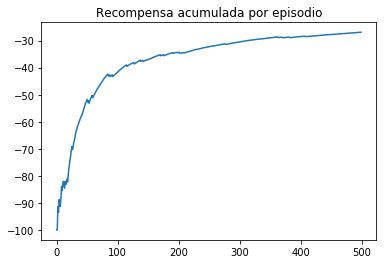

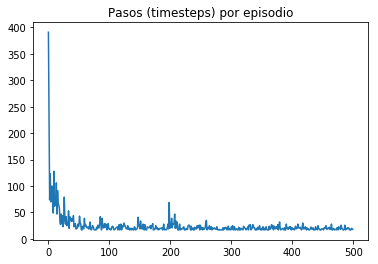

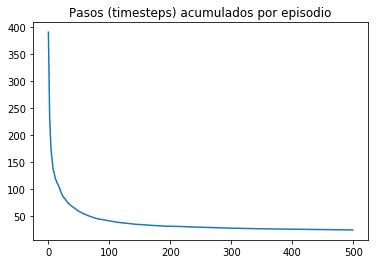

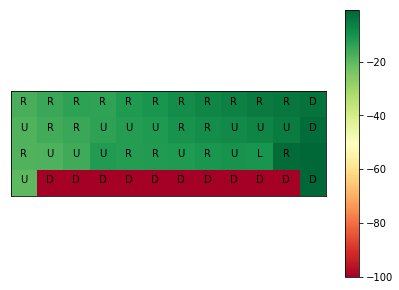


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.           -1.        ]]


In [31]:
#main
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)


avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

#plots
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)
plot_steps_per_episode_smooth(timesteps_ep)
draw_value_matrix(q)
env.close()

# Actividad 2: Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

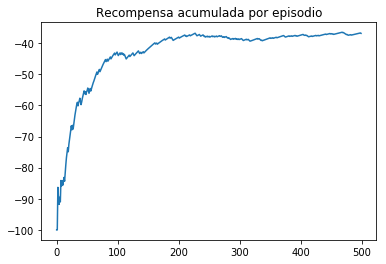

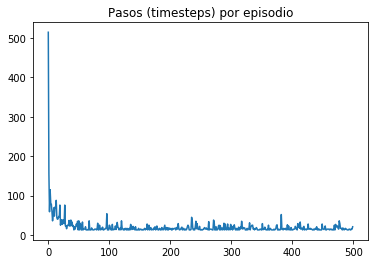

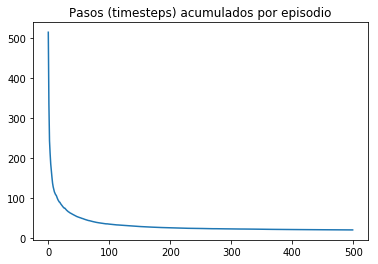

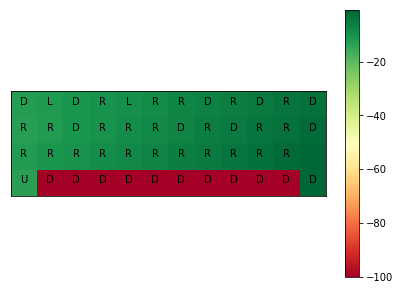


 Matriz de mejor acción-valor (en números): 

 [[ -12.24889991  -11.77764108  -10.96894797  -10.17497172   -9.27313729
    -8.4444192    -7.54828295   -6.66361883   -5.81657212   -4.88982406
    -3.95246406   -2.99911013]
 [ -12.77984264  -11.95161483  -10.98410877   -9.99918547   -8.99986748
    -7.99993635   -6.99996527   -5.99999364   -4.99999833   -3.99999964
    -2.99999998   -2.        ]
 [ -12.          -11.          -10.           -9.           -8.           -7.
    -6.           -5.           -4.           -3.           -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.           -1.        ]]


In [32]:
#main
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)


avg_steps_per_episode, timesteps_ep, reward_ep = run(q_learning)

#plots
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)
plot_steps_per_episode_smooth(timesteps_ep)
draw_value_matrix(q)
env.close()

## Análisis comparativo de Sarsa y Q Learning  
 Si se observan las matrices de mejor acción-valor de Sarsa y Q Learning se puede observar que en la primera se opta por el camino más seguro (lejos del precipicio), mientras  que en Q learning se va por el camino óptimo (borde del precipicio)
 Es por esto que con Q Learning el agente cae al precipicio con mayor frecuencia, lo que explica que la recompensa por episodio sea menor en Q learning, comparando la figura de Recompensa acumulada por episodio de ambos métodos.

# Actividad 3: 3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

### Híper-parámetro: $\alpha$

Sarsa  con alpha=0.01


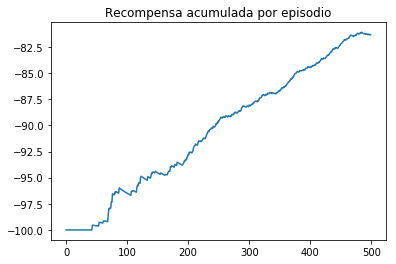

Q_Learning  con alpha=0.01


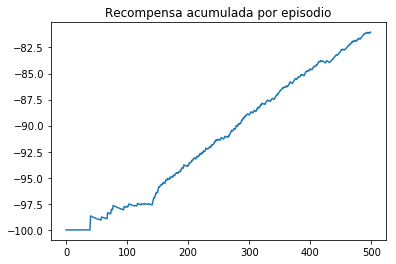

Sarsa  con alpha=0.99


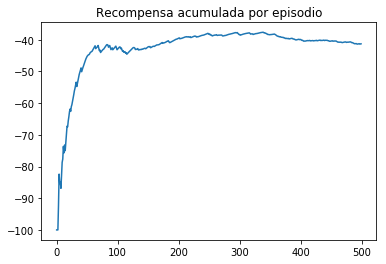

Q_Learning  con alpha=0.99


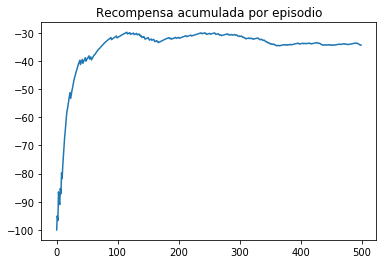

In [5]:
for alpha in [0.01,0.99]:
    for learn in [sarsa,q_learning]:
        q = {}
        # definimos sus híper-parámetros básicos
        gamma = 1
        epsilon = 0.1
        tau = 25
        episodes_to_run = 500

        env = gym.make("CliffWalking-v0")
        actions = range(env.action_space.n)

        # se declara una semilla aleatoria
        random_state = np.random.RandomState(42)

        avg_steps_per_episode, timesteps_ep, reward_ep = run(learn)

        #plots
        print(learn.__name__.title(), ' con alpha=%s'%alpha)
        plot_reward_per_episode(reward_ep)
        env.close()


En ambos métodos se puede observar que cuando disminuye el $\alpha$ se converge con menor velocidad (menor recompensa en muchos episodios) y si se aumenta el valor de alpha se converge con mayor velocidad (más recompensa en menor cantidad de episodios). 

### Híper-parámetro: $\epsilon$

Sarsa  con epsilon=0.01


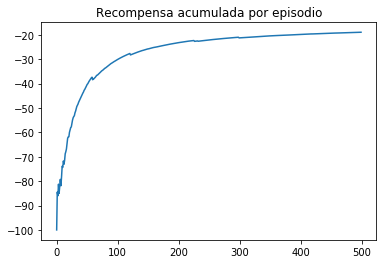

Q_Learning  con epsilon=0.01


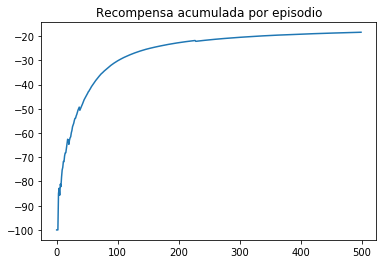

Sarsa  con epsilon=0.6


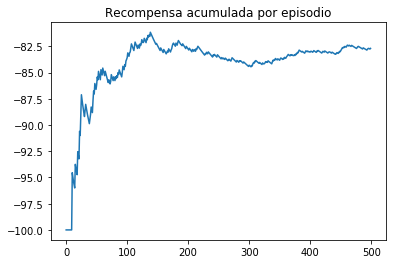

Q_Learning  con epsilon=0.6


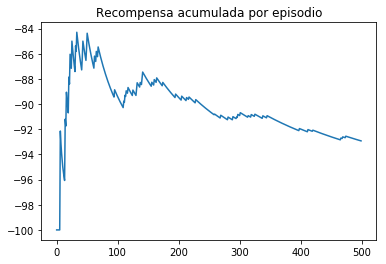

In [11]:
for epsilon in [0.01,0.6]:
    for learn in [sarsa,q_learning]:
        q = {}
        # definimos sus híper-parámetros básicos
        alpha=0.5
        gamma = 1        
        tau = 25
        episodes_to_run = 500

        env = gym.make("CliffWalking-v0")
        actions = range(env.action_space.n)

        # se declara una semilla aleatoria
        random_state = np.random.RandomState(42)

        avg_steps_per_episode, timesteps_ep, reward_ep = run(learn)

        #plots
        print(learn.__name__.title(), ' con epsilon=%s'%epsilon)
        plot_reward_per_episode(reward_ep)
        #plot_steps_per_episode_smooth(timesteps_ep)
        env.close()


El hiper-parámetro $\epsilon$ regula en que proporción el agente explota o explora. Se puede ver que a valores altos ($\epsilon=0.6$ ) la recompensa oscila notablemente en los primeros 200 episodios. En cambio, cuando usamos un valor bajo ($\epsilon=0.01$) está oscilación es menos notable.

### Híper-parámetro: $\gamma$

Sarsa  con gamma=0.01


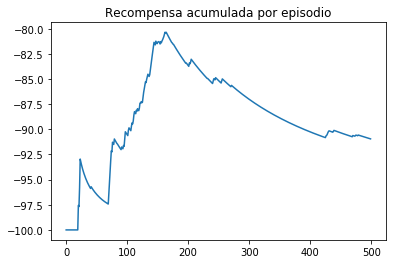

Q_Learning  con gamma=0.01


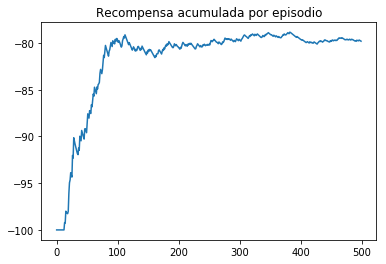

Sarsa  con gamma=0.99


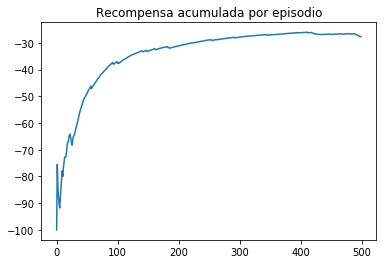

Q_Learning  con gamma=0.99


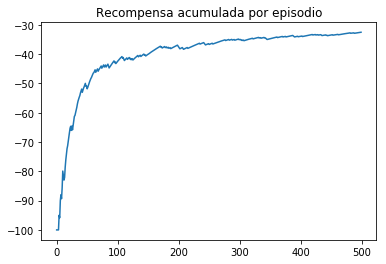

In [15]:
for gamma in [0.01,0.99]:
    for learn in [sarsa,q_learning]:
        q = {}
        # definimos sus híper-parámetros básicos
        alpha=0.5        
        epsilon = 0.1
        tau = 25
        episodes_to_run = 500

        env = gym.make("CliffWalking-v0")
        actions = range(env.action_space.n)

        # se declara una semilla aleatoria
        random_state = np.random.RandomState(42)

        avg_steps_per_episode, timesteps_ep, reward_ep = run(learn)

        #plots
        print(learn.__name__.title(), ' con gamma=%s'%gamma)
        plot_reward_per_episode(reward_ep)
        #plot_steps_per_episode_smooth(timesteps_ep)
        env.close()


El factor de descuento $\gamma$ tiene el efecto de cuanto valorar futuros rewards en comparación con rewards pasados. Se puede observar para valores bajos, ambos algoritmos tienen una peor performace.
También se puede observar que en Sarsa los rewards por episodio tienen una mayor oscilación.